In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры потока отказов для двух категорий потребителей (в 1 час)
λ1 = 0.1  # Поток отказов для категории Ⅰ
λ2 = 0.2  # Поток отказов для категории Ⅱ

# Создаем сетку значений времени обслуживания t1 и t2
t1, t2 = np.meshgrid(np.arange(0.5, 3, 0.05), np.arange(3, 5, 0.05))

# Вычисляем интенсивности обслуживания (μ1 и μ2) для каждой категории
μ1 = 1 / t1  # Интенсивность обслуживания для категории Ⅰ
μ2 = 1 / t2  # Интенсивность обслуживания для категории Ⅱ

In [2]:
# Интенсивности отказов для каждой категории
y1 = λ1 / μ1  # Для категории Ⅰ
y2 = λ2 / μ2  # Для категории Ⅱ
y = y1 + y2    # Общая интенсивность отказов (сумма для обеих категорий)

# Среднее время ожидания для категории Ⅰ
t_wait_1 = y1 / μ1 * (1 - y)  # Время ожидания для заявок с приоритетом
# Среднее время пребывания в системе для категории Ⅰ
t_system_1 = t_wait_1 + t1  # Время ожидания + время обслуживания

# Среднее время ожидания для категории Ⅱ
t_wait_2 = t2 * (μ2 * t1 * y1 / (1 - y) + y) / (1 - y)  # Время ожидания для заявок без приоритета
# Среднее время пребывания в системе для категории Ⅱ
t_system_2 = t_wait_2 + 1 / μ2  # Время ожидания + время обслуживания


In [3]:
# Словарь для хранения результатов расчетов
parameters = {
    'Среднее время ожидания в очереди для заявок с приоритетом': t_wait_1,
    'Среднее время пребывания в системе для заявок с приоритетом': t_system_1,
    'Среднее время ожидания в очереди для заявок без приоритета': t_wait_2,
    'Среднее время пребывания в системе для заявок без приоритета': t_system_2
}

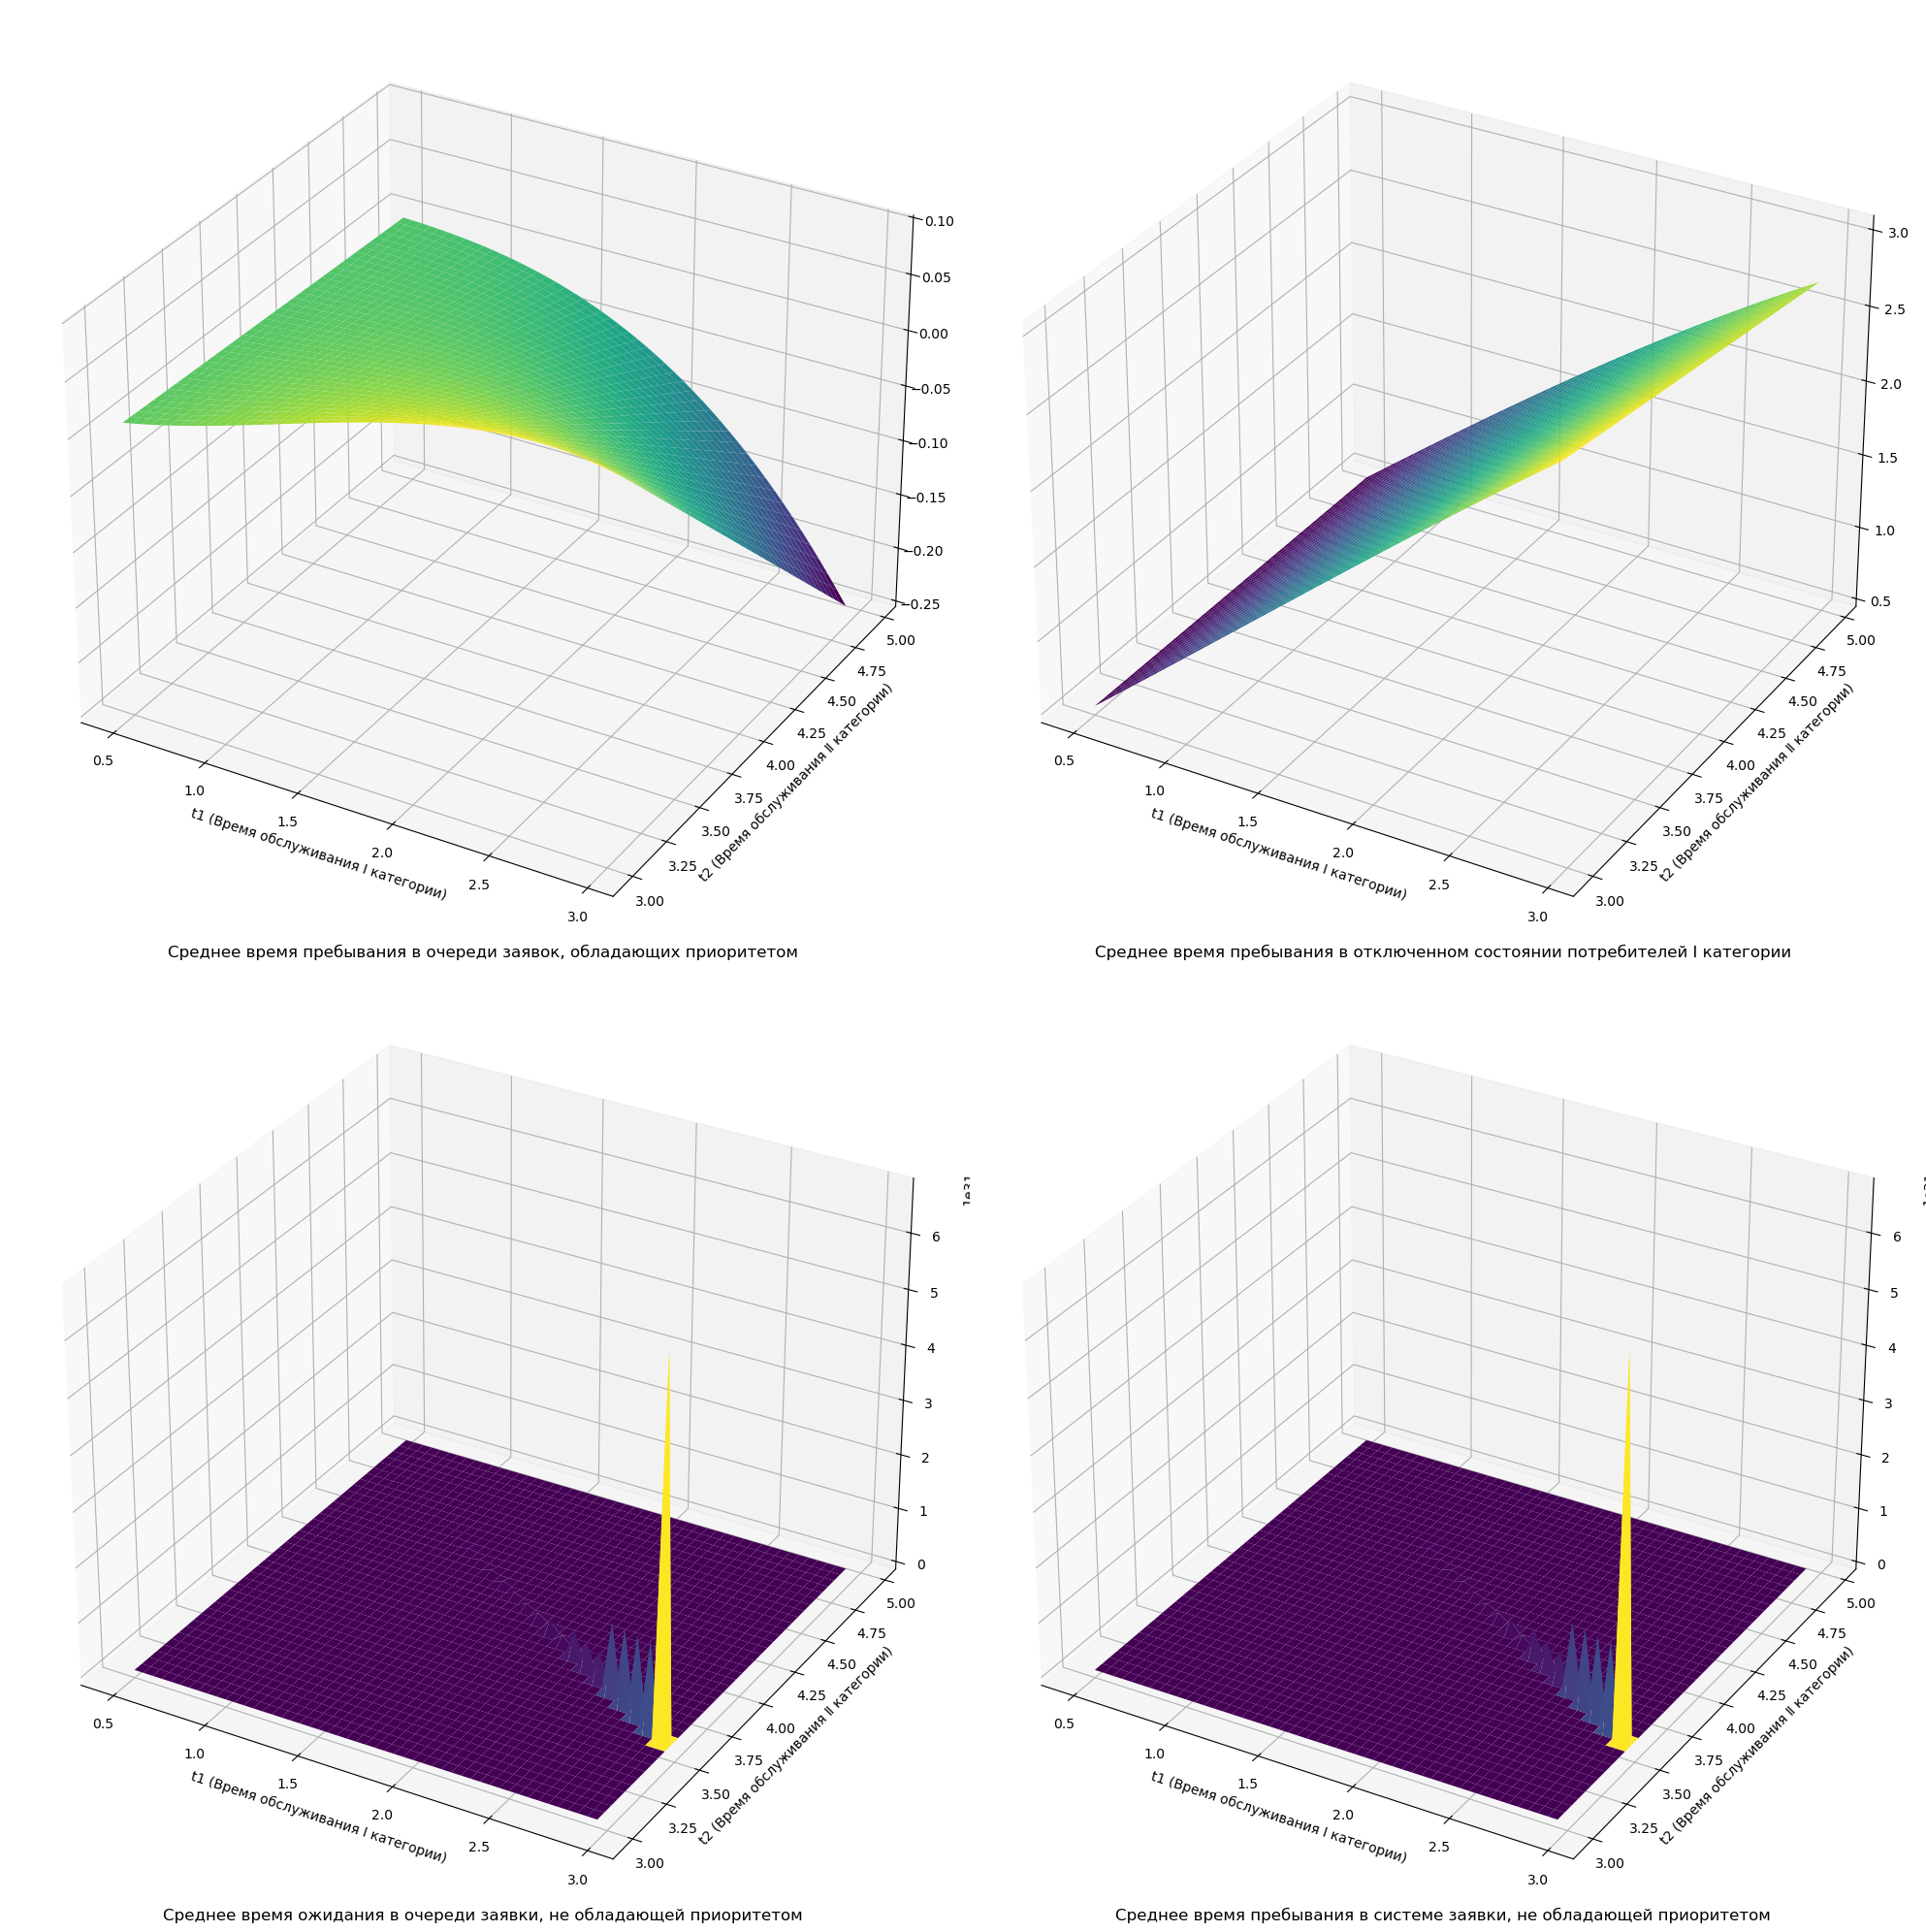

In [6]:
# Создание 3D графиков для каждого параметра
fig, axes = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': '3d'})

# Строим графики для каждого параметра
for i, (name, value) in enumerate(parameters.items()):
    ax = axes[i // 2][i % 2]
    ax.plot_surface(t1, t2, value, cmap='viridis')  # Строим поверхность
    ax.set_title(name, y=-0.01)  # Заголовок для графика
    ax.set_xlabel('t1 (Время обслуживания Ⅰ категории)')  # Подпись оси X
    ax.set_ylabel('t2 (Время обслуживания Ⅱ категории)')  # Подпись оси Y

# Настройка компоновки графиков
plt.tight_layout()
plt.show()